In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D , Dropout , BatchNormalization
from keras.models import Sequential
import tensorflow_hub as hub

from PIL import Image
import cv2
import matplotlib.image as mpimg

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , auc
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
image_path_folder = "C:/Users/Vyshnavi Reddy/java/java1/archive (2)/Sports-celebrity images"
class_labels = os.listdir(image_path_folder)
class_labels

['Kane Williamson', 'Kobe Bryant', 'Maria Sharapova', 'Ronaldo']

In [12]:
class_labels = {'Kane Williamson':0, 'Ronaldo':1, 'Maria Sharapova':2, 'Kobe Bryant':3}
class_labels['Kane Williamson']

0

In [13]:
image_path_folder = "C:/Users/Vyshnavi Reddy/java/java1/archive (2)/Sports-celebrity images"

image_data = []
label_data = []
for folder in os.listdir(image_path_folder):
    #print(folder)  # Kane Williamson
    path = os.path.join(image_path_folder,folder)
    #print(path)  # /kaggle/input/sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson
    for img in os.listdir(path):
        #print(img)  # kane_(24).jpg
        image = Image.open(path+"/"+img)
        image = image.resize((224,224))
        image = np.array(image)
        #print(image.shape)
        image_data.append(image)
        label_data.append(class_labels[folder])

In [14]:
print(len(image_data))
print(len(label_data))

441
441


In [15]:
x = np.array(image_data)
y = np.array(label_data)

In [16]:
x_train, x_test ,y_train, y_test = train_test_split(x ,y , test_size=0.10, shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(396, 224, 224, 3)
(45, 224, 224, 3)
(396,)
(45,)


In [17]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [18]:
list_labels = ['Kane Williamson', 'Ronaldo', 'Maria Sharapova', 'Kobe Bryant']

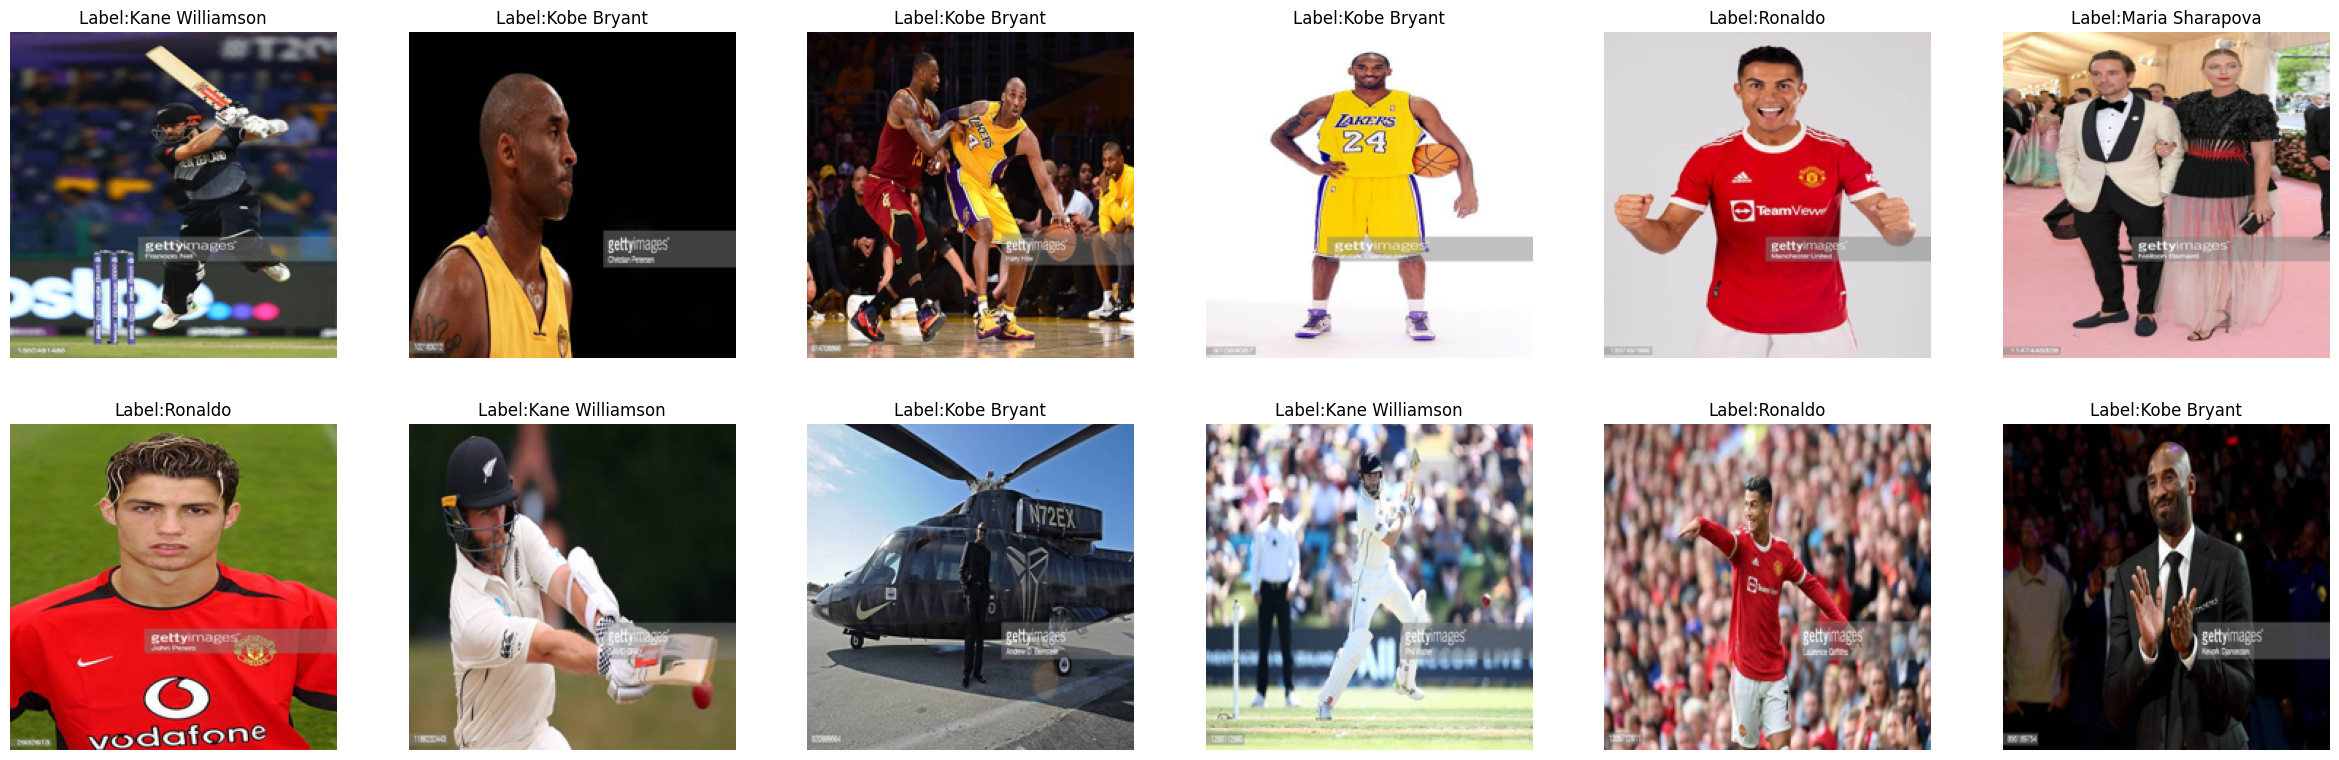

In [20]:
plt.figure(figsize=(30,50))

for i in range(12):
    plt.subplot(10,6,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label:{list_labels[y_train[i]]}")
    plt.axis("off")

In [21]:
class_labels

{'Kane Williamson': 0, 'Ronaldo': 1, 'Maria Sharapova': 2, 'Kobe Bryant': 3}

In [26]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomRotation(0.2)
])


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import EfficientNetB0

# Load the pre-trained EfficientNetB0 model
efficient_net = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), pooling='avg', weights='imagenet')

num_classes = 4
model = Sequential()
model.add(efficient_net)
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ ?                           │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [43]:
history = model.fit(x_train_scaled, y_train, batch_size=64 ,epochs=5,
                validation_data=(x_test_scaled,y_test)
                   )

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 247s 19s/step - accuracy: 0.5359 - loss: 1.2917 - val_accuracy: 0.2222 - val_loss: 1.4568
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 153s 18s/step - accuracy: 0.9463 - loss: 0.1528 - val_accuracy: 0.2222 - val_loss: 1.4611
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 157s 19s/step - accuracy: 0.9756 - loss: 0.0793 - val_accuracy: 0.2222 - val_loss: 1.6630
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 195s 24s/step - accuracy: 0.9708 - loss: 0.0904 - val_accuracy: 0.2222 - val_loss: 1.7393
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 206s 27s/step - accuracy: 0.9835 - loss: 0.0610 - val_accuracy: 0.2222 - val_loss: 1.7625


In [45]:
loss,acc = model.evaluate(x_train_scaled,y_train)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(x_test_scaled, y_test)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 657ms/step - accuracy: 0.2452 - loss: 1.6643
Loss on Train data: 1.6407068967819214
Accuracy on Train data: 0.2525252401828766
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.2419 - loss: 1.7395
Loss on Test data: 1.762452483177185
Accuracy on Test data: 0.2222222238779068


In [46]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

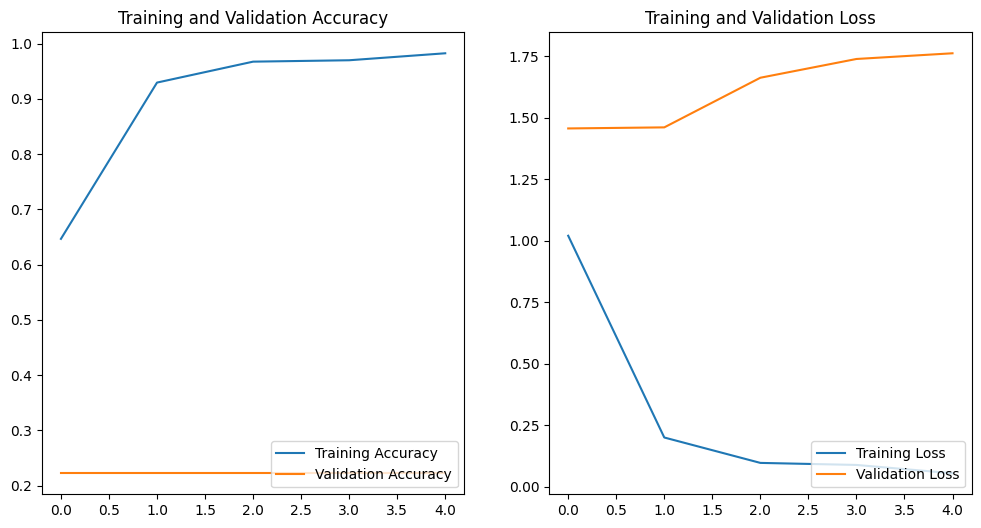

In [47]:
EPOCHS=5
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [48]:
y_pred = model.predict(x_test_scaled)
y_pred = [np.argmax(i) for i in y_pred]

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


In [49]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 0  0  0 15]
 [ 0  0  0 10]
 [ 0  0  0 10]
 [ 0  0  0 10]]

Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.22      1.00      0.36        10

    accuracy                           0.22        45
   macro avg       0.06      0.25      0.09        45
weighted avg       0.05      0.22      0.08        45



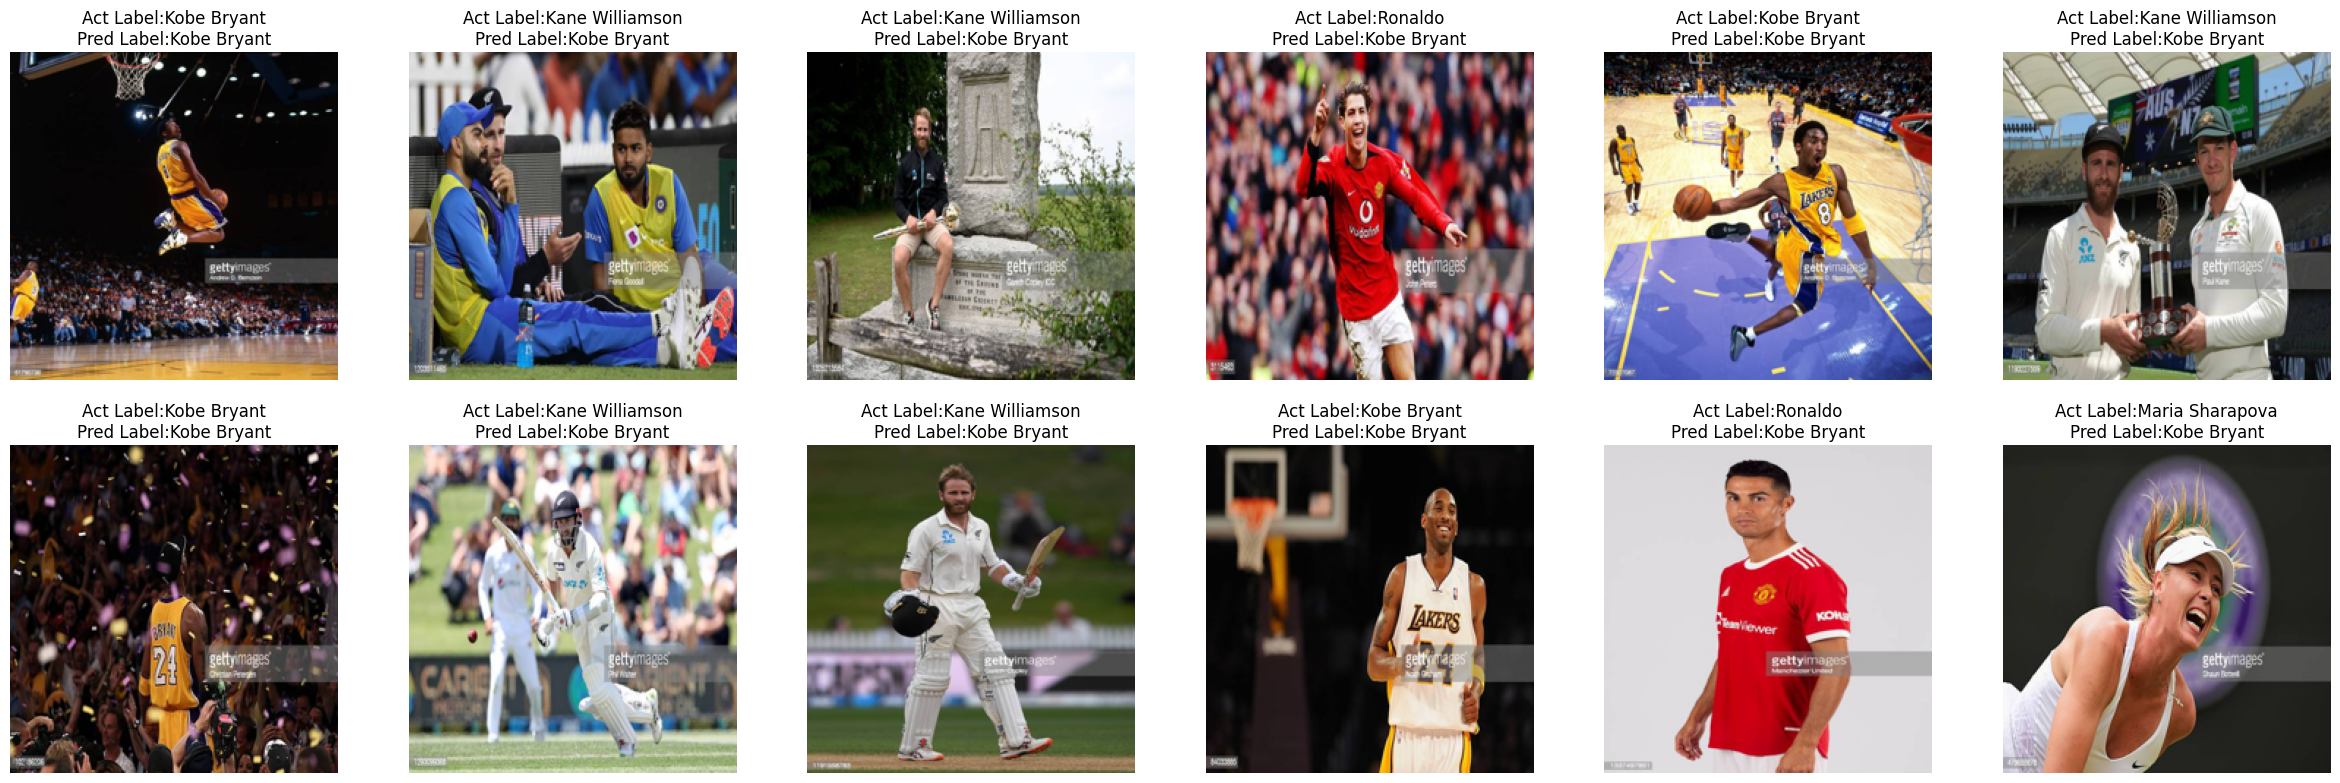

In [50]:
plt.figure(figsize=(30,40))
for i in range(12):
    plt.subplot(8,6,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Act Label:{list_labels[y_test[i]]}\nPred Label:{list_labels[y_pred[i]]}")
    plt.axis("off")